In [163]:
import pandas as pd
import json
import glob

In [164]:
hrv_raw = pd.read_csv('./Fitbit/ShiYangLee/Sleep/daily_hrv_full.csv')
hrv_raw.head()

,timestamp,rmssd,nremhr,entropy
0,2022-02-27T00:00:00,52.053,53.789,2.833
1,2022-02-28T00:00:00,61.281,49.983,2.935
2,2022-03-01T00:00:00,59.392,50.798,2.943
3,2022-03-02T00:00:00,56.437,54.837,2.829
4,2022-03-03T00:00:00,54.982,52.368,2.927


In [165]:
hrv_raw.set_index('timestamp', inplace = True)

In [166]:
hrv_raw.index = pd.to_datetime(hrv_raw.index, format = '%Y-%m-%d')
# hrv_raw.index = hrv_raw.index.to_series().dt.strftime('%Y-%m-%d')

<AxesSubplot:xlabel='timestamp'>

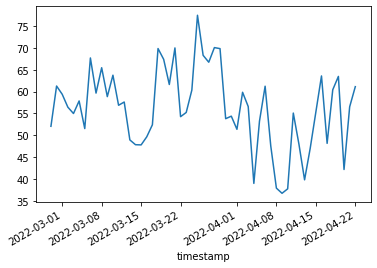

In [167]:
hrv_raw['rmssd'].plot()

In [168]:
hrv_raw['hrv_rolling'] = hrv_raw['rmssd'].rolling(7, 3, center = True).mean()

<AxesSubplot:xlabel='timestamp'>

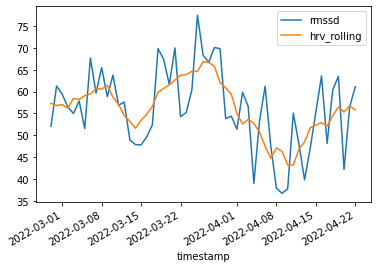

In [169]:
hrv_raw[['rmssd', 'hrv_rolling']].plot()

In [170]:
steps_raw = pd.read_csv('./Fitbit/ShiYangLee/Physical Activity/steps_full.csv')
steps_raw

,dateTime,value
0,2022-02-26 22:15:00,0
1,2022-02-26 22:16:00,5
2,2022-02-26 22:17:00,0
3,2022-02-26 22:18:00,0
4,2022-02-26 22:19:00,0
...,...,...
39856,2022-04-23 18:01:00,0
39857,2022-04-23 18:02:00,0
39858,2022-04-23 18:03:00,0
39859,2022-04-23 18:04:00,0


In [171]:
steps_raw.set_index('dateTime', inplace = True)
steps_raw.index = pd.to_datetime(steps_raw.index)
steps_per_day = steps_raw.groupby(steps_raw.index.to_series().dt.date).sum()
steps_per_day.index = pd.to_datetime(steps_per_day.index)

In [172]:
steps_per_day.head()

,value
dateTime,
2022-02-26,60
2022-02-27,2542
2022-02-28,6426
2022-03-01,9602
2022-03-02,7721


In [173]:
hrv = hrv_raw.merge(steps_per_day, left_index=True, right_index=True)

In [174]:
hrv['steps_normalized'] = hrv['value']/100
hrv['steps_rolling'] = hrv['steps_normalized'].rolling(7, 3, center = True).mean()

<AxesSubplot:>

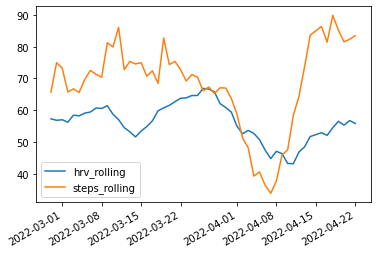

In [175]:
hrv[['hrv_rolling', 'steps_rolling']].plot()

In [176]:
sleep_dir = glob.glob('./Fitbit/ShiYangLee/Sleep/sleep-*.json')
dfs = []
for file in sleep_dir:
    data = pd.read_json(file)
    dfs.append(data)
sleep = pd.concat(dfs, ignore_index=True)
sleep.head()

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
0,36625185402,2022-04-24,2022-04-23T22:20:30.000,2022-04-24T09:35:30.000,40500000,0,568,107,0,675,96,stages,0,"{'summary': {'deep': {'count': 5, 'minutes': 9...",True
1,36617451798,2022-04-23,2022-04-23T13:25:00.000,2022-04-23T14:56:00.000,5460000,0,80,11,0,91,88,classic,2,"{'summary': {'restless': {'count': 4, 'minutes...",False
2,36613912467,2022-04-23,2022-04-22T23:23:00.000,2022-04-23T11:20:30.000,43020000,0,623,94,0,717,93,stages,0,"{'summary': {'deep': {'count': 7, 'minutes': 1...",True
3,36600884643,2022-04-22,2022-04-21T23:13:00.000,2022-04-22T07:21:30.000,29280000,0,436,52,0,488,97,stages,0,"{'summary': {'deep': {'count': 1, 'minutes': 3...",True
4,36595887971,2022-04-21,2022-04-21T17:09:00.000,2022-04-21T18:34:00.000,5100000,0,82,3,0,85,96,classic,2,"{'summary': {'restless': {'count': 2, 'minutes...",False


In [177]:
json_struct = json.loads(sleep.to_json(orient='records'))
sleep = pd.json_normalize(json_struct)

In [178]:
sleep.drop(['levels.data', 'levels.shortData'], axis=1, inplace=True)
sleep

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,...,levels.summary.light.thirtyDayAvgMinutes,levels.summary.rem.count,levels.summary.rem.minutes,levels.summary.rem.thirtyDayAvgMinutes,levels.summary.restless.count,levels.summary.restless.minutes,levels.summary.awake.count,levels.summary.awake.minutes,levels.summary.asleep.count,levels.summary.asleep.minutes
0,36625185402,2022-04-24,2022-04-23T22:20:30.000,2022-04-24T09:35:30.000,40500000,0,568,107,0,675,...,271.0,14.0,143.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN
1,36617451798,2022-04-23,2022-04-23T13:25:00.000,2022-04-23T14:56:00.000,5460000,0,80,11,0,91,...,NaN,NaN,NaN,NaN,4.0,10.0,1.0,1.0,0.0,80.0
2,36613912467,2022-04-23,2022-04-22T23:23:00.000,2022-04-23T11:20:30.000,43020000,0,623,94,0,717,...,269.0,12.0,153.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN
3,36600884643,2022-04-22,2022-04-21T23:13:00.000,2022-04-22T07:21:30.000,29280000,0,436,52,0,488,...,267.0,6.0,95.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN
4,36595887971,2022-04-21,2022-04-21T17:09:00.000,2022-04-21T18:34:00.000,5100000,0,82,3,0,85,...,NaN,NaN,NaN,NaN,2.0,3.0,0.0,0.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,35927511475,2022-03-02,2022-03-01T22:53:00.000,2022-03-02T05:49:30.000,24960000,0,394,22,0,416,...,195.0,4.0,112.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN
69,35918720085,2022-03-01,2022-03-01T03:01:30.000,2022-03-01T09:26:00.000,23040000,0,321,63,0,384,...,199.0,6.0,58.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN
70,35833591962,2022-02-28,2022-02-28T01:00:00.000,2022-02-28T07:15:58.000,22500000,27,328,48,0,375,...,205.0,5.0,74.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN
71,35874554379,2022-02-27,2022-02-27T17:15:00.000,2022-02-27T18:25:00.000,4200000,26,41,3,0,70,...,NaN,NaN,NaN,NaN,7.0,21.0,6.0,8.0,0.0,41.0


In [179]:
sleep.to_csv('sleep_tmp.csv')

In [180]:
sleep = sleep[~sleep.duplicated(subset='logId', keep='last')]

In [181]:
sleep_duration_df = sleep.set_index('dateOfSleep')
sleep_duration_df.index = pd.to_datetime(sleep_duration_df.index)
print(sleep_duration_df.index.dtype)
sleep_duration_df = sleep_duration_df['minutesAsleep'].groupby(sleep_duration_df.index.to_series().dt.date).sum()

datetime64[ns]


In [182]:
sleep_duration_df.sort_index(inplace = True)
sleep_duration_df

dateOfSleep
2022-02-27    395
2022-02-28    328
2022-03-01    321
2022-03-02    394
2022-03-03    287
2022-03-04    395
2022-03-05    544
2022-03-06    469
2022-03-07    470
2022-03-08    403
2022-03-09    425
2022-03-10    459
2022-03-11    519
2022-03-12    218
2022-03-13    435
2022-03-14    590
2022-03-15    367
2022-03-16    344
2022-03-17    534
2022-03-18    360
2022-03-19    591
2022-03-20    475
2022-03-21    464
2022-03-22    304
2022-03-23    449
2022-03-24    468
2022-03-25    446
2022-03-26    466
2022-03-27    590
2022-03-28    424
2022-03-29    404
2022-03-30    432
2022-03-31    507
2022-04-01    518
2022-04-02    604
2022-04-03    488
2022-04-04    474
2022-04-05    493
2022-04-06    469
2022-04-07    623
2022-04-08    545
2022-04-09    676
2022-04-10    588
2022-04-11    359
2022-04-12    343
2022-04-13    504
2022-04-14    452
2022-04-15    122
2022-04-16    555
2022-04-17    504
2022-04-18    286
2022-04-19    421
2022-04-20    442
2022-04-21    391
2022-04-22    43

In [183]:
tmp = hrv.merge(sleep_duration_df, left_index=True, right_index=True)

In [186]:
tmp['minutesAsleep_normalized'] = tmp['minutesAsleep']/10
tmp['minutesAsleep_rolling'] = tmp['minutesAsleep_normalized'].rolling(7, 3, center=True)\
                                .mean()
tmp.head()

,rmssd,nremhr,entropy,hrv_rolling,value,steps_normalized,steps_rolling,minutesAsleep,minutesAsleep_normalized,minutesAsleep_rolling
2022-02-27,52.053,53.789,2.833,57.290750,2542,25.42,65.727500,395,39.5,35.950000
2022-02-28,61.281,49.983,2.935,56.829000,6426,64.26,74.984000,328,32.8,34.500000
2022-03-01,59.392,50.798,2.943,57.001500,9602,96.02,73.248333,321,32.1,35.333333
2022-03-02,56.437,54.837,2.829,56.220143,7721,77.21,65.765714,394,39.4,38.057143
2022-03-03,54.982,52.368,2.927,58.457857,11201,112.01,66.738571,287,28.7,39.114286


<AxesSubplot:>

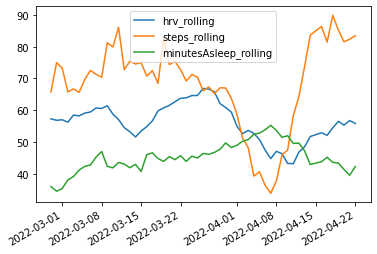

In [187]:
tmp[['hrv_rolling', 'steps_rolling', 'minutesAsleep_rolling']].plot()